In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col="Date",parse_dates=True)

In [45]:
print(data.shape)
data.head()

(64248, 3)


,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


C:\Users\RINSU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


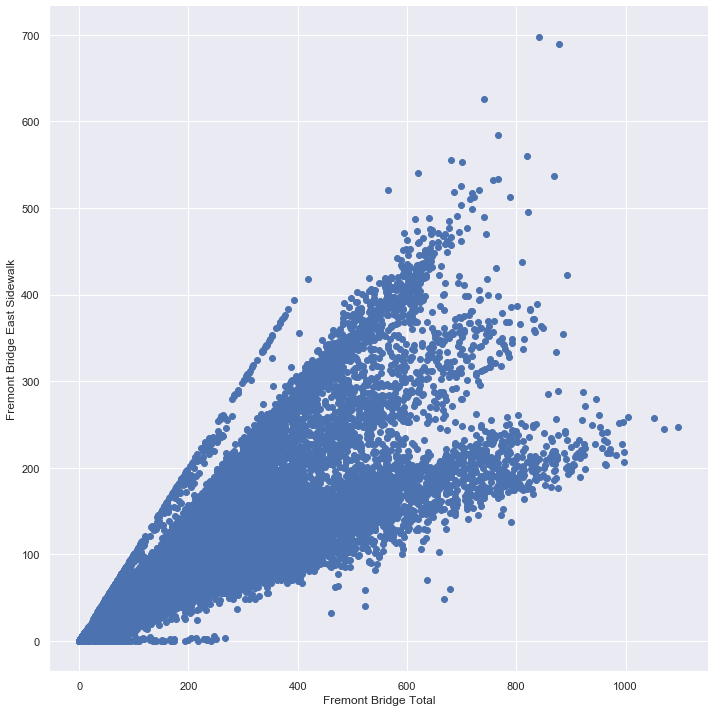

In [4]:
sns.FacetGrid(data,size=10)\
    .map(pl.scatter,"Fremont Bridge Total","Fremont Bridge East Sidewalk")\
    .add_legend()

In [5]:
data=data.drop("Fremont Bridge Total",axis=1)


In [6]:
data.columns=['West','East']
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [7]:
data['Total']=data.eval('West+East')
# adding two rows east and west by easy way data.eval()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [8]:
data.dropna().describe()

,West,East,Total
count,64238.000000,64238.000000,64238.000000
mean,52.153959,61.756172,113.910131
std,67.179748,90.507860,145.289364
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,15.000000
50%,29.000000,30.000000,61.000000
75%,70.000000,74.000000,148.000000
max,698.000000,850.000000,1097.000000


Text(0, 0.5, 'Hourly Bicycle count')

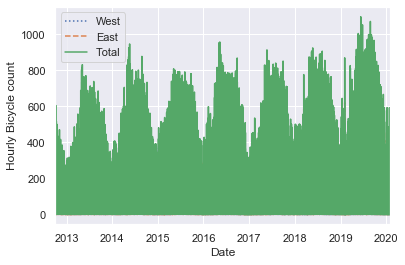

In [9]:
data.plot(style=[':','--','-'])
pl.ylabel("Hourly Bicycle count")

In [10]:
weekly=data.resample('W').sum()

In [11]:
weekly.head()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


Text(0, 0.5, 'Weekly bicycle count')

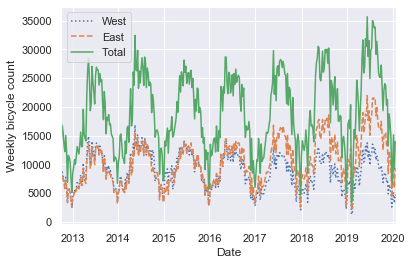

In [12]:
weekly.plot(style=[':','--','-'])
pl.ylabel("Weekly bicycle count")

Text(0, 0.5, 'Mean hourly count')

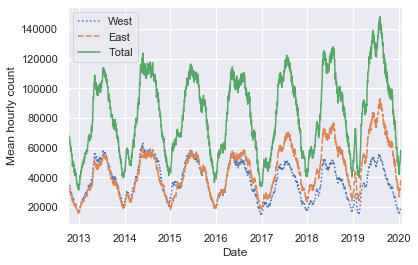

In [13]:
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
pl.ylabel("Mean hourly count")

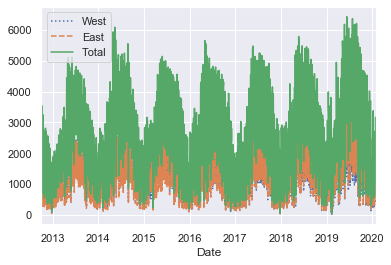

In [14]:
daily.plot(style=[':','--','-'])
# this is difference between above rolling and normal plot

Text(0, 0.5, 'Yearly mean count')

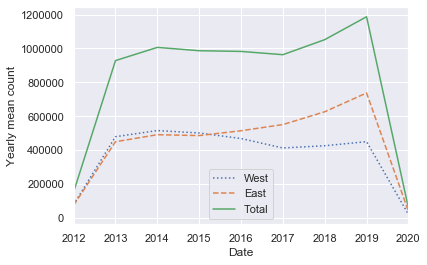

In [15]:
yearly=data.resample('Y').sum()
yearly.plot(style=[':','--','-'])
pl.ylabel("Yearly mean count")

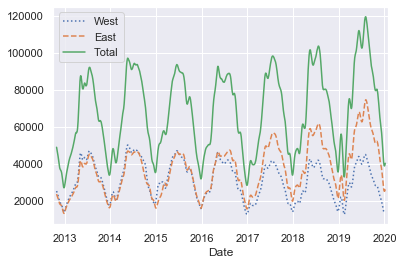

In [16]:
daily.rolling(50,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

In [17]:
daily=daily.reset_index()

In [18]:
day=pd.DataFrame(daily.iloc[:1185,:])
day.head()
day=day.set_index("Date")

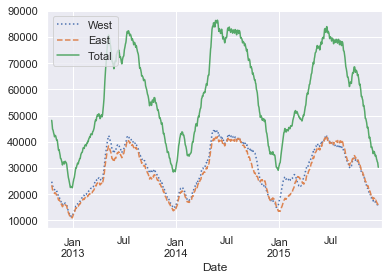

In [28]:
day.rolling(30,center=True,win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

In [29]:
by_time=data.groupby(data.index.time).mean()
hourl_ticks=4*60*60*np.arange(6)
hourl_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

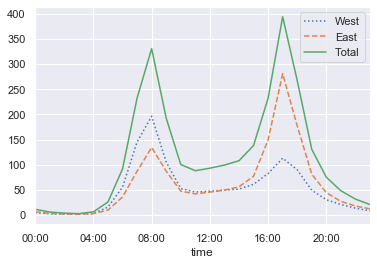

In [32]:
by_time.plot(xticks=hourl_ticks,style=[':','--','-'])

,West,East,Total
Mon,59.645070,74.051811,133.696880
Tues,63.915121,78.728562,142.643683
Wed,63.375435,77.996410,141.371845
Thurs,60.577567,73.757615,134.335183
Fri,54.526986,66.609140,121.136126
Sat,31.983312,31.464442,63.447753
Sun,30.985811,29.582296,60.568107


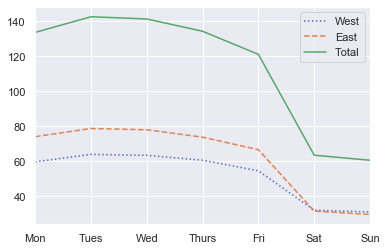

In [44]:
by_weekday=data.groupby(data.index.dayofweek).mean()
by_weekday.index=['Mon','Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':','--','-'])
by_weekday

In [59]:
data1=pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
data1.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [60]:
day=data1.resample('W').sum()

In [61]:
day

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-07,14292.0,7297.0,6995.0
2012-10-14,16795.0,8679.0,8116.0
2012-10-21,15509.0,7946.0,7563.0
2012-10-28,13437.0,6901.0,6536.0
2012-11-04,12194.0,6408.0,5786.0
...,...,...,...
2020-01-05,9941.0,3597.0,6344.0
2020-01-12,15132.0,5141.0,9991.0
2020-01-19,9123.0,3229.0,5894.0


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
10/03/2012 12:00:00 AM,13.0,4.0,9.0
10/03/2012 01:00:00 AM,10.0,4.0,6.0
10/03/2012 02:00:00 AM,2.0,1.0,1.0
10/03/2012 03:00:00 AM,5.0,2.0,3.0
10/03/2012 04:00:00 AM,7.0,6.0,1.0
...,...,...,...
01/31/2020 07:00:00 PM,64.0,12.0,52.0
01/31/2020 08:00:00 PM,42.0,7.0,35.0
01/31/2020 09:00:00 PM,20.0,2.0,18.0
